In [1]:
import idpi.products.ninjo_k2th as ninjo
from idpi.grib_decoder import GribReader
from idpi.data_source import DataSource

In [2]:
datafile = "/store/s83/osm/KENDA-1/ANA22/det/laf2022020900"
source = DataSource(datafiles=[datafile])
reader = GribReader(source, ref_param=("HHL", "ml"))

In [3]:
ds = reader.load_fieldnames(["U", "V", "W", "P", "T", "QV", "QC", "QI", "HHL"])
observed_mean, observed_at_theta = ninjo.ninjo_k2th(
    ds["U"],
    ds["V"],
    ds["W"],
    ds["T"],
    ds["P"],
    ds["QV"],
    ds["QC"],
    ds["QI"],
    ds["HHL"],
)

INFO:idpi.products.ninjo_k2th:Computing potential temperature
INFO:idpi.products.ninjo_k2th:Computing total density
INFO:idpi.products.ninjo_k2th:Computing terrain following grid deformation factors
INFO:idpi.products.ninjo_k2th:Computing potential vorticity
INFO:idpi.products.ninjo_k2th:Computing mean potential vorticity between 700 and 900 hPa
INFO:idpi.products.ninjo_k2th:Interpolating ('p', 'u', 'v', 'pot_vortic') at isotherms


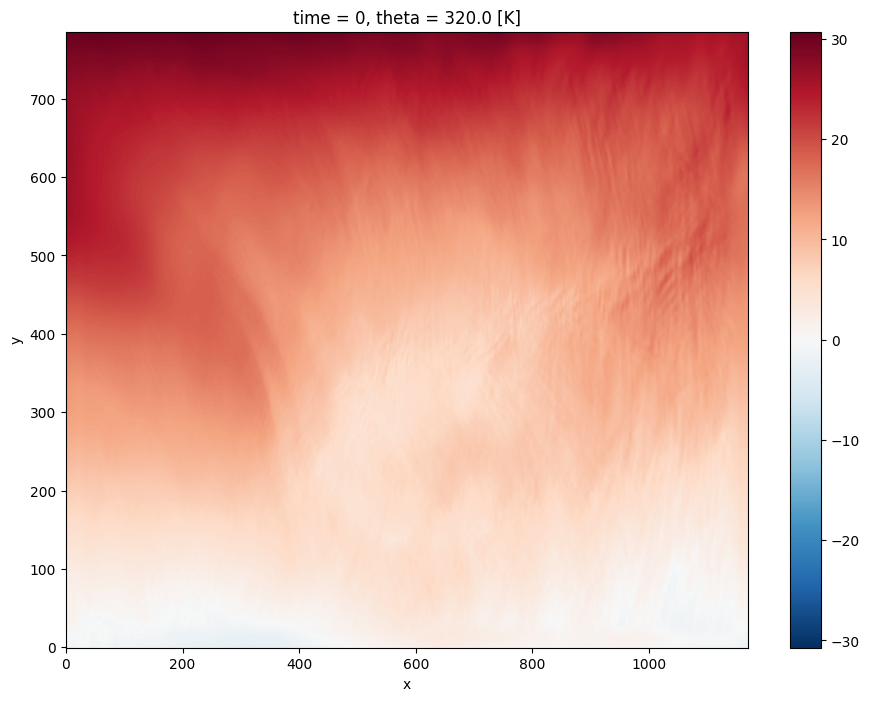

In [4]:
observed_at_theta["u"].isel(theta=2).plot(figsize=(11, 8))

In [6]:
import xarray as xr

fs_ds = xr.open_dataset("/tmp/pytest-of-ckanesan/pytest-72/test_ninjo_k2th0/00_outfile.nc")

In [14]:
from numpy.testing import assert_allclose

assert_allclose(
    fs_ds["POT_VORTIC_MEAN"].isel(z_1=0),
    observed_mean,
    atol=3e-6,
)

In [15]:
assert_allclose(
    fs_ds["POT_VORTIC_AT_THETA"],
    observed_at_theta["pot_vortic"],
    atol=3e-7,
    rtol=1e-5,
)

In [16]:
assert_allclose(
    fs_ds["P"],
    observed_at_theta["p"],
    atol=1e-2,
    rtol=1e-3,
)

AssertionError: 
Not equal to tolerance rtol=0.001, atol=0.01

Mismatched elements: 1 / 5517720 (1.81e-05%)
Max absolute difference: 2918.8438
Max relative difference: 0.05496048
 x: array([[[[65721.33 , 65726.055, 66006.65 , ..., 50206.94 , 50185.383,
          50165.05 ],
         [65677.664, 65679.875, 65976.91 , ..., 50218.285, 50195.7  ,...
 y: array([[[[65721.33 , 65726.055, 66006.65 , ..., 50206.914, 50185.383,
          50165.055],
         [65677.664, 65679.875, 65976.91 , ..., 50218.28 , 50195.67 ,...

In [24]:
assert_allclose(
    fs_ds["U"],
    observed_at_theta["u"],
    atol=1e-3,
    rtol=1e-3,
)

AssertionError: 
Not equal to tolerance rtol=0.001, atol=0.001

Mismatched elements: 3 / 5517720 (5.44e-05%)
Max absolute difference: 0.41924047
Max relative difference: 1.6021036
 x: array([[[[-5.154321, -5.159791, -5.318527, ..., -5.878956, -5.872374,
          -5.865288],
         [-5.099116, -5.103808, -5.267708, ..., -5.870478, -5.863555,...
 y: array([[[[-5.154321, -5.159791, -5.318527, ..., -5.878958, -5.872374,
          -5.865288],
         [-5.099116, -5.103807, -5.267708, ..., -5.870478, -5.863556,...

Text(0.5, 1.0, 'U Component Relative error')

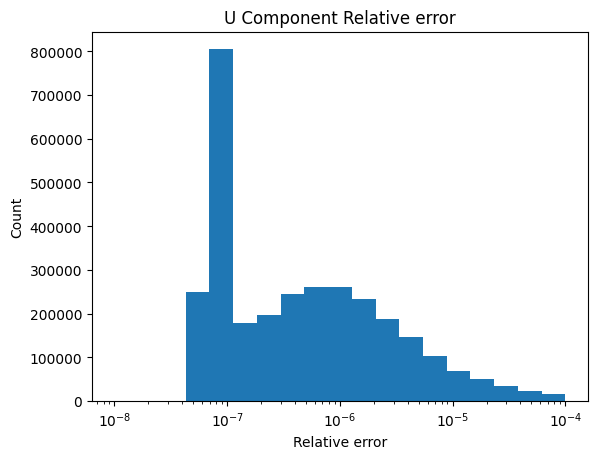

In [9]:
import numpy as np
import matplotlib.pyplot as plt
delta =  np.abs(fs_ds["U"].values - observed_at_theta["u"].values) / np.abs(fs_ds["U"].values)
plt.hist(delta.flatten(), bins=np.logspace(-8, -4, 20))
plt.xscale("log")
plt.xlabel("Relative error")
plt.ylabel("Count")
plt.title("U Component Relative error")

Text(0.5, 1.0, 'V Component Relative error')

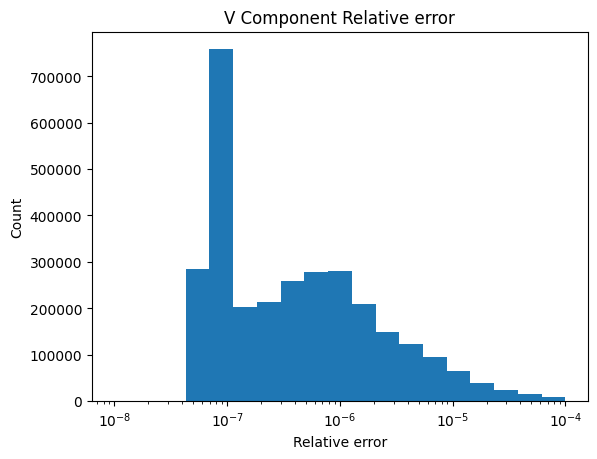

In [10]:
delta =  np.abs(fs_ds["V"].values - observed_at_theta["v"].values) / np.abs(fs_ds["V"].values)
plt.hist(delta.flatten(), bins=np.logspace(-8, -4, 20))
plt.xscale("log")
plt.xlabel("Relative error")
plt.ylabel("Count")
plt.title("V Component Relative error")

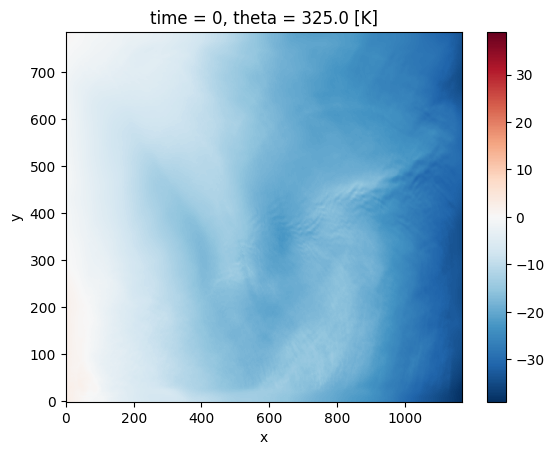

In [26]:
observed_at_theta["v"].isel(theta=3).plot()

In [23]:
assert_allclose(
    fs_ds["V"],
    observed_at_theta["v"],
    atol=1e-3,
    rtol=1e-3,
)

AssertionError: 
Not equal to tolerance rtol=0.001, atol=0.001

Mismatched elements: 1 / 5517720 (1.81e-05%)
Max absolute difference: 0.13921833
Max relative difference: 3.5743065
 x: array([[[[  2.994636,   2.942691,   2.984369, ..., -24.598715,
          -24.62373 , -24.65071 ],
         [  3.027426,   2.974591,   3.017491, ..., -24.585573,...
 y: array([[[[  2.994636,   2.942691,   2.984369, ..., -24.59874 ,
          -24.62373 , -24.65071 ],
         [  3.027426,   2.974591,   3.017491, ..., -24.585571,...